In [1]:
'''
The Beer production dataset provides a time series data for monthly beer production in Australia, for the period Jan 1956 – Aug 1995.
Objective:
• Check for the stationarity of your data using Rolling Statistics and Dickey-Fuller test.
• If stationarity is present, remove it using differencing in Python.

'''

'\nThe Beer production dataset provides a time series data for monthly beer production in Australia, for the period Jan 1956 – Aug 1995.\nObjective:\n• Check for the stationarity of your data using Rolling Statistics and Dickey-Fuller test.\n• If stationarity is present, remove it using differencing in Python.\n\n'

In [2]:
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [3]:
data = pd.read_csv('monthly-beer-production-in-austr.csv')
data.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
data.set_index(pd.to_datetime(data['Month']+str('-15')), inplace=True)
data.drop('Month', axis=1, inplace=True)

In [5]:
data.head()

,Monthly beer production in Australia
Month,
1956-01-15,93.2
1956-02-15,96.0
1956-03-15,95.2
1956-04-15,77.1
1956-05-15,70.9


In [6]:
ts = data['Monthly beer production in Australia']
ts.head(15)

Month
1956-01-15     93.2
1956-02-15     96.0
1956-03-15     95.2
1956-04-15     77.1
1956-05-15     70.9
1956-06-15     64.8
1956-07-15     70.1
1956-08-15     77.3
1956-09-15     79.5
1956-10-15    100.6
1956-11-15    100.7
1956-12-15    107.1
1957-01-15     95.9
1957-02-15     82.8
1957-03-15     83.3
Name: Monthly beer production in Australia, dtype: float64

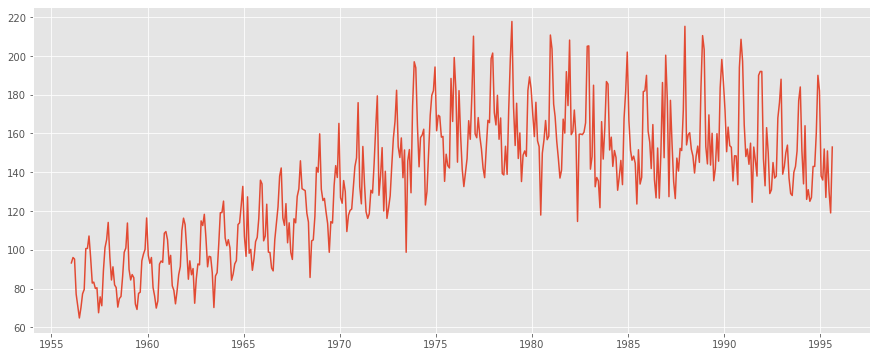

In [7]:
plt.plot(ts) # data is trending 1957-1980 upwards, 1980 1995 relatively downwards

<AxesSubplot:xlabel='Monthly beer production in Australia', ylabel='Count'>

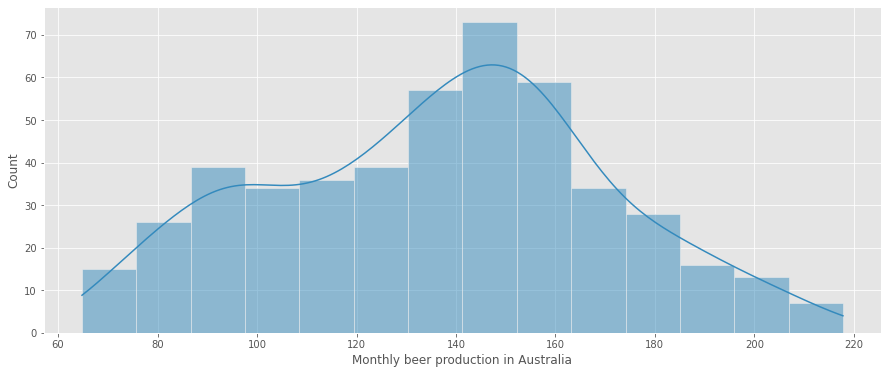

In [8]:
# distribution of data..
sns.histplot(ts, kde=True) # bimodal

<AxesSubplot:xlabel='Monthly beer production in Australia', ylabel='Count'>

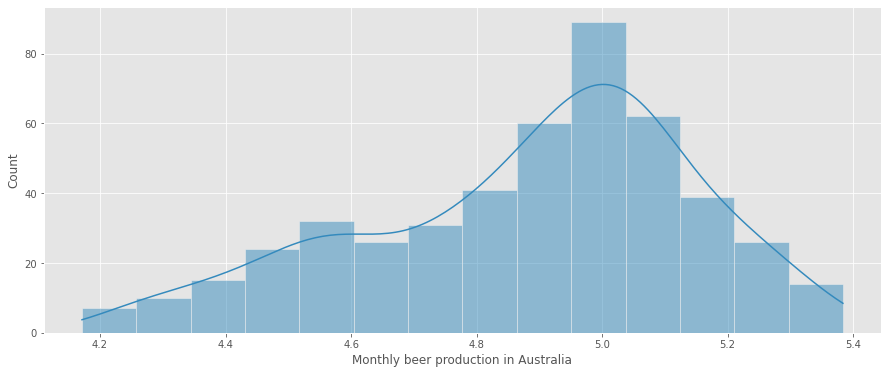

In [9]:
# try to normalize by transforming to log
ts_log = np.log(ts)
sns.histplot(ts_log, kde=True) # looks better

In [10]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=152, center=False).mean()
    rolstd = timeseries.rolling(window=152, center=False).std()
    
    origin = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Mean')
    std = plt.plot(rolstd, color='black', label='Standard Deviation')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)
    
    print("Results of Dickey Fuller tests:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'p-value', '#Lags Used',
                                             'Number of observations used'])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    print(dfoutput)
    
    

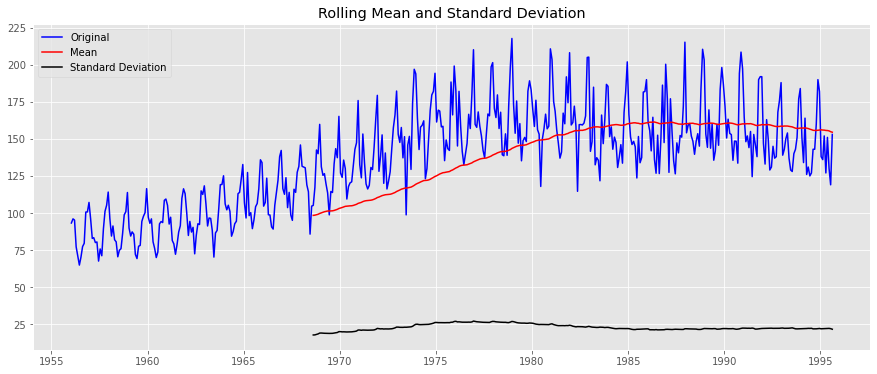

Results of Dickey Fuller tests:
Test Statistic                  -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of observations used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [11]:
# test for Stationary time series (dickey-fuller test)
# NULL hypothesis: Time series is non-stationary
# If Test statistics < Critical value, reject NULL Hypothesis
test_stationarity(data['Monthly beer production in Australia'])

# from observations and plot, test statistics is more than all critical values
# and moving average is partially  constant over time (1985 onwards), so null hypothesis of dickey fuller test cannot be rejected
# This shows that the timeseries is not stationary (partially stationary)

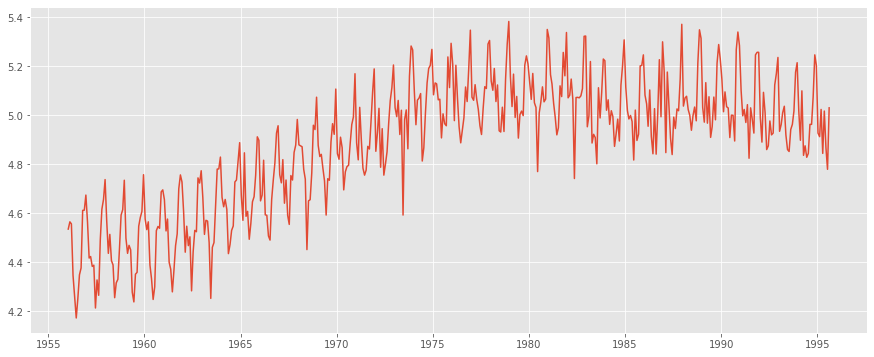

In [12]:
# Decomposing the data, plot the moving average
plt.plot(ts_log)


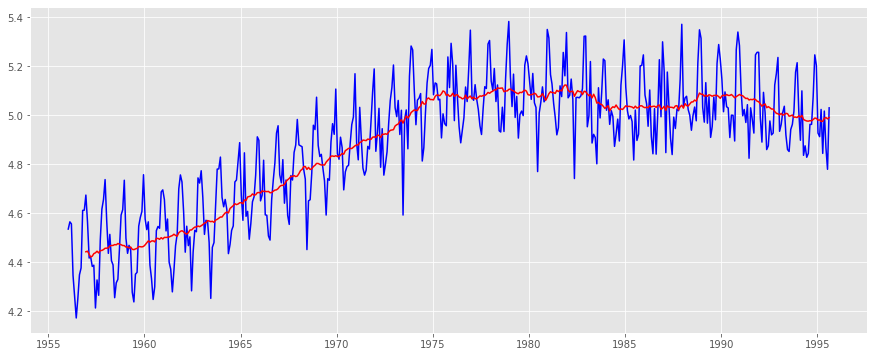

In [13]:
movingAverage = ts_log.rolling(window=12).mean() # choosing months of the year as rolling window
movingStd = ts_log.rolling(window=12).std()
plt.plot(ts_log, color = 'blue')
plt.plot(movingAverage, color='red')

In [14]:
# make stationary data...differencing the actual from movingaverage
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(12)

Month
1956-12-15    0.231830
1957-01-15    0.118994
1957-02-15   -0.015558
1957-03-15    0.001590
1957-04-15   -0.041908
1957-05-15   -0.047399
1957-06-15   -0.225688
1957-07-15   -0.117442
1957-08-15   -0.173166
1957-09-15    0.045062
1957-10-15    0.168757
1957-11-15    0.204867
Name: Monthly beer production in Australia, dtype: float64

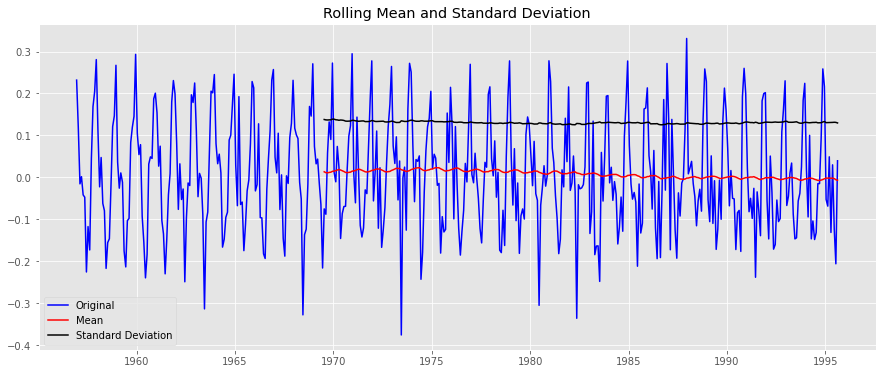

Results of Dickey Fuller tests:
Test Statistic                  -3.432559
p-value                          0.009898
#Lags Used                      13.000000
Number of observations used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [15]:
test_stationarity(ts_log_mv_diff) # test statistics is < 5% of critical value hence null DF hypothesis cannot be rejected...TS is stationary 